In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#imported the requird libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read dataset
loan_data = pd.read_csv('/content/drive/MyDrive/train_loan_data (1).csv')

In [5]:
loan_data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [6]:
loan_data.tail()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid
79999,NY,1100000.0,Jun-99,2 years,Managing Director,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,586259,96.7,B4,36 months,Debt consolidation,32,Source Verified,Paid


In [7]:
loan_data.shape

(80000, 28)

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [9]:
loan_data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [10]:
loan_data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [11]:
len(loan_data.columns)

28

In [12]:
loan_data.dtypes

addr_state               object
annual_inc              float64
earliest_cr_line         object
emp_length               object
emp_title                object
fico_range_high           int64
fico_range_low            int64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal                 int64
revol_util              float64
sub_grade                object
term                     object
title                    object
total_acc                 int64
verification_status      object
loan_status              object
dtype: object

In [13]:
loan_data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [14]:
#filling missing values
loan_data['emp_title'].fillna(loan_data['emp_title'].mode()[0], inplace=True)


In [15]:
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)

In [16]:
loan_data['num_actv_bc_tl'].fillna(loan_data['num_actv_bc_tl'].mean(), inplace=True)

In [17]:
loan_data['mort_acc'].fillna(loan_data['mort_acc'].mean(), inplace=True)

In [18]:
loan_data['tot_cur_bal'].fillna(loan_data['tot_cur_bal'].mean(), inplace=True)

In [19]:
loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mean(), inplace=True)

In [20]:
loan_data['revol_util'].fillna(loan_data['revol_util'].mean(), inplace=True)

In [21]:
loan_data['title'].fillna(loan_data['title'].mode()[0], inplace=True)


In [22]:
#rechecking the have any missing values

loan_data.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [23]:
loan_data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.205971,1.970071,1.553891e+05,5.483362,0.579854,0.383128,2.264915e+04,24.496717,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,3.112450e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,9.302100e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.036260e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [24]:
# Identifying categorical variables
categorical_columns = loan_data.select_dtypes(include=['object']).columns

In [25]:
# Identifying numerical variables
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns

In [26]:
# Print the categorical and numerical columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')
Numerical Columns: Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')


In [27]:
print(len(categorical_columns))
print(len(numerical_columns))

14
14


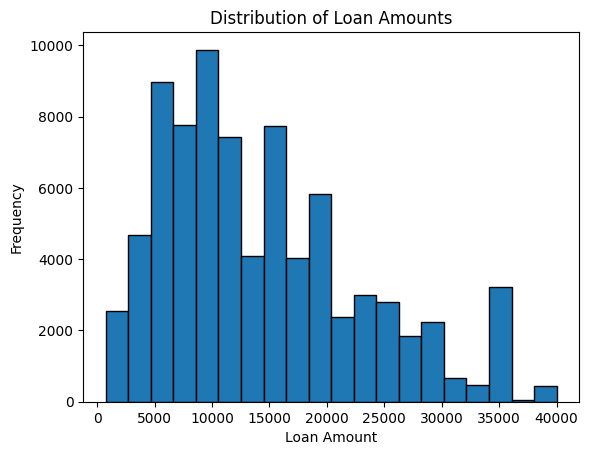

In [28]:
#visualization for beetter understanding with histogrm
plt.hist(loan_data['loan_amnt'], bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

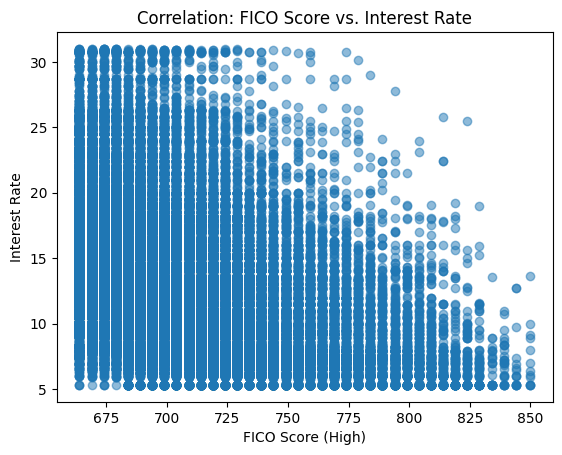

In [29]:
#scatterplot correlation between credict score and interest rate
plt.scatter(loan_data['fico_range_high'], loan_data['int_rate'], alpha=0.5)
plt.xlabel('FICO Score (High)')
plt.ylabel('Interest Rate')
plt.title('Correlation: FICO Score vs. Interest Rate')
plt.show()

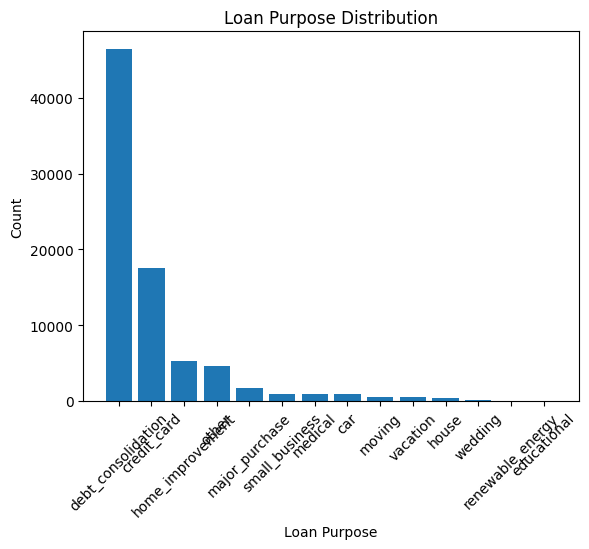

In [30]:
#bar char understand the loan purpose
purpose_counts = loan_data['purpose'].value_counts()
plt.bar(purpose_counts.index, purpose_counts.values)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)
plt.show()

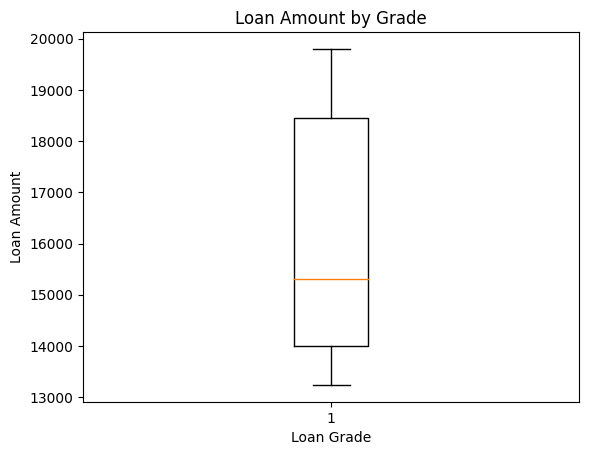

In [31]:
#boxplot uderstanding the loan amount
plt.boxplot(loan_data.groupby('grade')['loan_amnt'].mean())
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Grade')
plt.show()

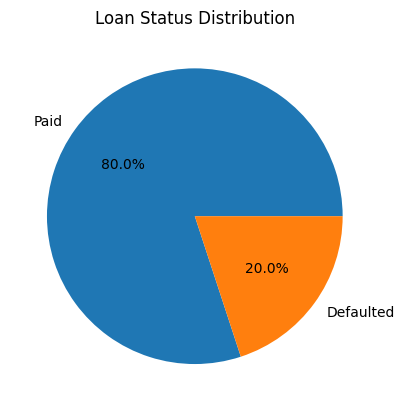

In [32]:
loan_status_counts = loan_data['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

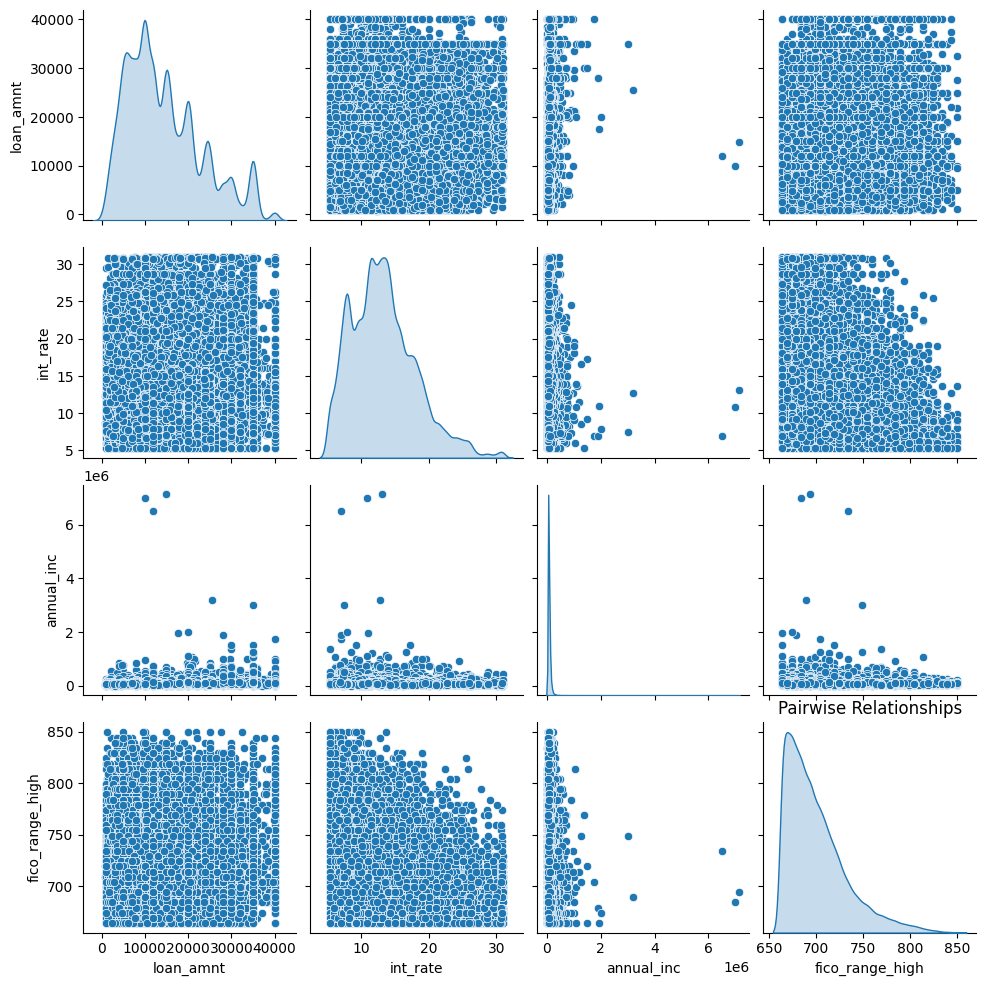

In [33]:
sns.pairplot(loan_data[['loan_amnt', 'int_rate', 'annual_inc', 'fico_range_high']], diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()

In [34]:
#calculating the outliers
def find_outliers_IQR(loan_data):
    q1 = loan_data.quantile(0.25)
    q3 = loan_data.quantile(0.75)
    IQR = q3 - q1
    outliers = loan_data[((loan_data < (q1 - 1.5 * IQR)) | (loan_data > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(loan_data['loan_amnt'])
print(outliers)

211      40000
379      40000
396      40000
453      40000
701      40000
         ...  
78366    38400
78872    40000
79178    38400
79421    40000
79824    40000
Name: loan_amnt, Length: 431, dtype: int64


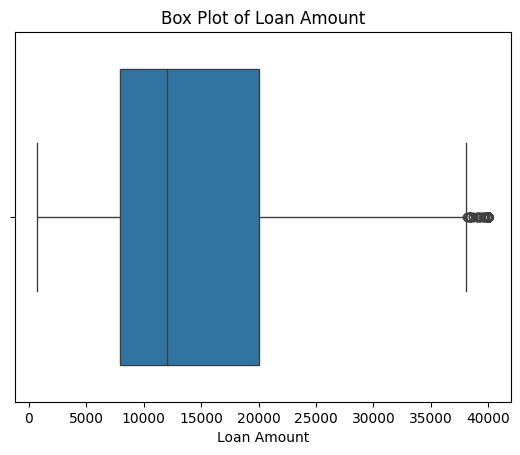

In [35]:
#boxplot
sns.boxplot(x=loan_data['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Box Plot of Loan Amount')
plt.show()

In [36]:
#cal z - score
from scipy.stats import zscore

z_scores = zscore(loan_data['loan_amnt'])
outliers = loan_data[abs(z_scores) > 3].all(axis=1)
print(outliers)

Series([], dtype: bool)


In [37]:
loan_data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
# feature scaling using standarscaler
scaler = StandardScaler()
loan_data_scaled = scaler.fit_transform(loan_data[numerical_columns])

In [40]:
#feture scaling using min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
loan_data_scaled = scaler.fit_transform(loan_data[numerical_columns])


In [41]:
print(loan_data_scaled)

[[0.0119018  0.43010753 0.43243243 ... 0.0052132  0.61336828 0.0375    ]
 [0.00560085 0.32258065 0.32432432 ... 0.0194777  0.39515072 0.0625    ]
 [0.00840127 0.08064516 0.08108108 ... 0.0226566  0.57994758 0.0875    ]
 ...
 [0.0126019  0.32258065 0.32432432 ... 0.00381858 0.16775885 0.15      ]
 [0.01316199 0.02688172 0.02702703 ... 0.01161884 0.32372215 0.2875    ]
 [0.15402327 0.         0.         ... 0.5725521  0.63368283 0.1875    ]]


In [42]:
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [43]:
#feature scaling

from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder(sparse=False)

In [45]:
categorical_cols = ['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status']


In [46]:
encoded_loan_data = pd.DataFrame(encoder.fit_transform(loan_data[categorical_cols]))

In [47]:
encoded_loan_data

,0,1,2,3,4,5,6,7,8,9,...,42774,42775,42776,42777,42778,42779,42780,42781,42782,42783
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
79997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
encoded_loan_data = pd.DataFrame(encoder.fit_transform(loan_data[categorical_cols]))


In [49]:
encoded_loan_data

,0,1,2,3,4,5,6,7,8,9,...,42774,42775,42776,42777,42778,42779,42780,42781,42782,42783
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
79997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [51]:
target_variable_type = "classification"

In [52]:
if target_variable_type == "classification":
    score_func = chi2
else:
    score_func = f_classif

In [53]:
# Feature selection using SelectKBest for classification
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(loan_data_scaled, loan_data['loan_status'])
print(selector.scores_)
print(selector.pvalues_)


[1.29972889e+00 1.98929420e+02 2.00000727e+02 5.88461567e+02
 4.73661137e+01 4.50831099e+00 3.11249345e+01 1.40219882e+01
 2.57012376e+00 4.33356303e+00 8.50534722e+00 1.33991786e+00
 1.81252547e+01 3.53309835e-01]
[2.54262751e-001 3.57650942e-045 2.08772486e-045 5.41427590e-130
 5.88920034e-012 3.37305331e-002 2.41943438e-008 1.80685336e-004
 1.08899212e-001 3.73679458e-002 3.54104336e-003 2.47048454e-001
 2.06839853e-005 5.52245466e-001]


In [54]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(loan_data_scaled, loan_data['loan_status'], test_size=0.2, random_state=42)

In [55]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [56]:
# Create a list of models to evaluate
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]

In [57]:
# Evaluate each model and store the results

results = []

for model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results.append({

        'Model': model.__class__.__name__,

        'Accuracy': accuracy

    })

In [58]:
# Print the results

for result in results:

    print(f"{result['Model']}: {result['Accuracy']}")

LogisticRegression: 0.8041875
DecisionTreeClassifier: 0.6986875
RandomForestClassifier: 0.8031875
KNeighborsClassifier: 0.77175
GaussianNB: 0.7181875
SVC: 0.805375


In [59]:
# Find the model with the highest accuracy

best_model = max(results, key=lambda x: x['Accuracy'])

print(f"Best Model: {best_model['Model']}")

Best Model: SVC


In [60]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(loan_data_scaled, loan_data['loan_status'], test_size=0.2, random_state=42)

# Create an instance of the best model (SVC)
svc_model = SVC()

# Fit the model to the training data
svc_model.fit(X_train, y_train)

# Predict the loan status for the test data
y_pred = svc_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.805375


In [61]:

# Import necessary libraries
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# Create a list of base models
base_models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Create an ensemble model using VotingClassifier
voting_classifier = VotingClassifier(estimators=[('lr', base_models[0]), ('dt', base_models[1]), ('rf', base_models[2])], voting='hard')

# Fit the ensemble model to the training data
voting_classifier.fit(X_train, y_train)

# Predict the loan status for the test data
y_pred = voting_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy}")

# Create an ensemble model using AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1)

# Fit the ensemble model to the training data
ada_boost_classifier.fit(X_train, y_train)

# Predict the loan status for the test data
y_pred = ada_boost_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy}")

# Create an ensemble model using GradientBoostingClassifier
gradient_boost_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)

# Fit the ensemble model to the training data
gradient_boost_classifier.fit(X_train, y_train)

# Predict the loan status for the test data
y_pred = gradient_boost_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy}")


Voting Classifier Accuracy: 0.8043125
AdaBoost Classifier Accuracy: 0.70075
Gradient Boosting Classifier Accuracy: 0.805125


In [ ]:
#performing the cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc_model, loan_data_scaled, loan_data['loan_status'], cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

In [ ]:


# Define the hyperparameter grid

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 'scale']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svc_model, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Create a new SVC model with the best hyperparameters
best_model = SVC(**best_params)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict the loan status for the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")


In [ ]:

from sklearn.metrics import f1_score
# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
# Print the F1 score
print("F1 Score:", f1)
